<a href="https://colab.research.google.com/github/mohammadsanatabassum/labs-and-projects-on-aiml-/blob/main/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 2: Appreciating, Interpreting and Visualizing Data

In [1]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=4.5,
                rc={"lines.linewidth": 2.5})

In [2]:
digits = load_digits()
digits.data.shape



(1797, 64)

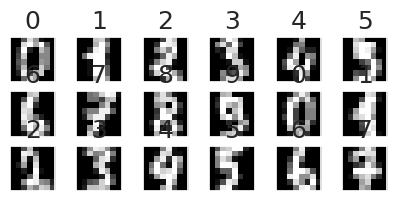

In [3]:
nrows, ncols = 3, 6
plt.figure(figsize=(5,2))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [4]:

X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [5]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

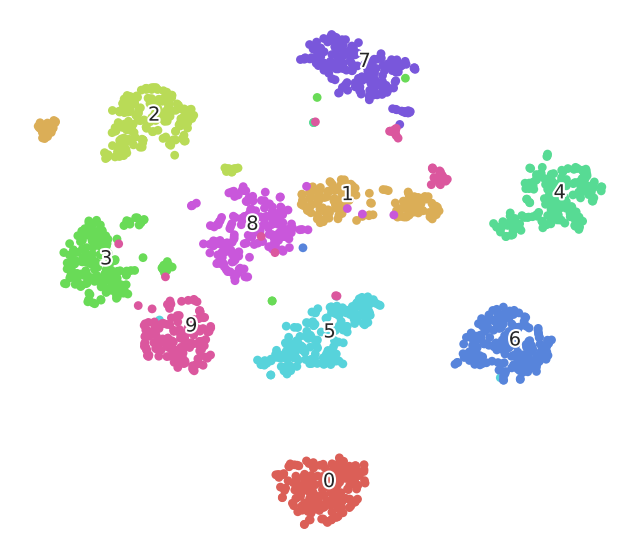

(<Figure size 800x700 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a63f91a7eb0>)

In [7]:
def scatter(x, colors):

    palette = np.array(sns.color_palette("hls", 10))


    f = plt.figure(figsize=(8, 7))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    txts = []
    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=3, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

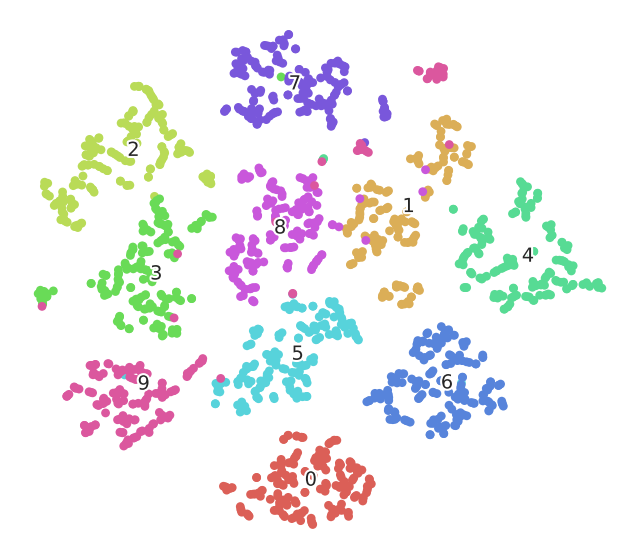

(<Figure size 800x700 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a63f9192a10>)

In [8]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


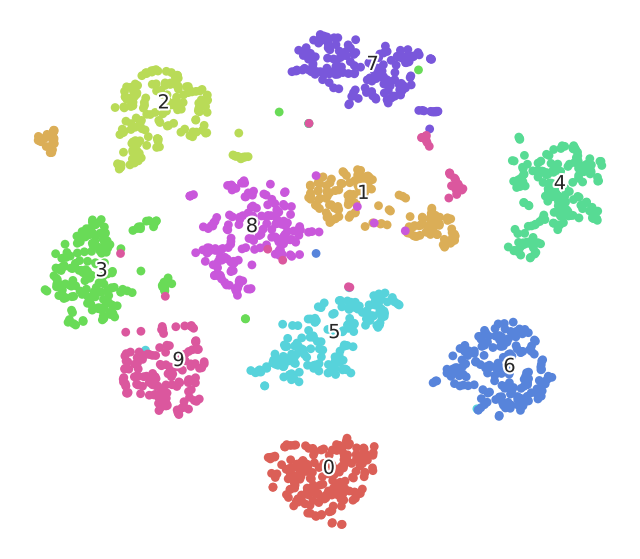

(<Figure size 800x700 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a63f918b490>)

In [9]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=450).fit_transform(X)

scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


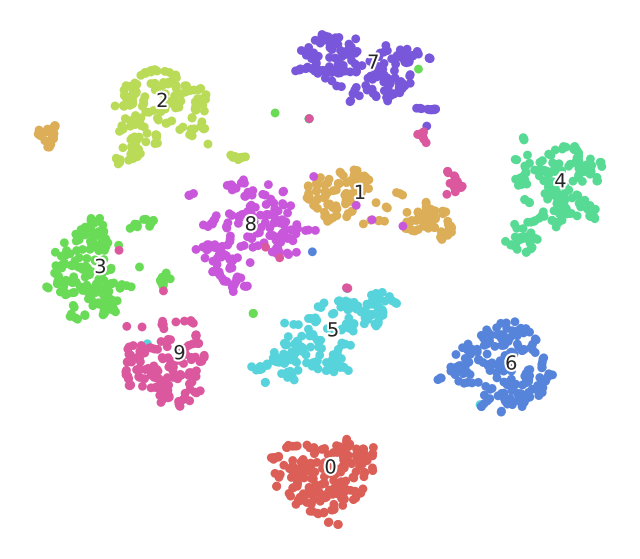

(<Figure size 800x700 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a63fb2f7640>)

In [10]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=500).fit_transform(X)

scatter(digits_proj, y)

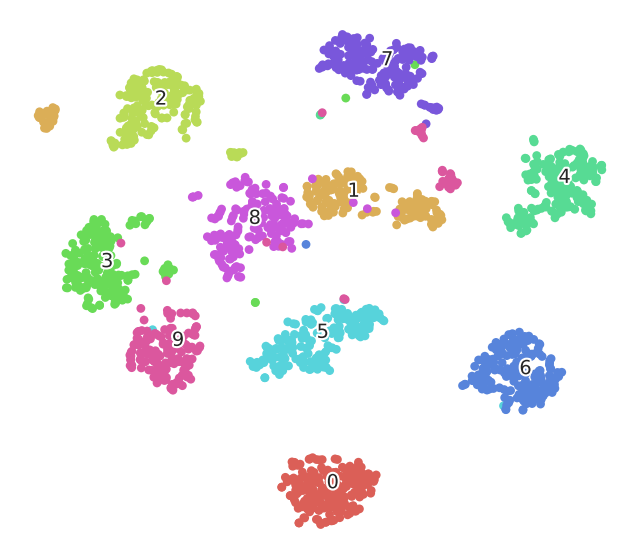

(<Figure size 800x700 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a63f657f190>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)



  1)  How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

   2) What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


1)Computational Complexity and Runtime of t-SNE

    Scalability with Dataset Size:
        t-SNE has a computational complexity of O(N2)O(N2), where NN is the number of data points.
        This is because it involves computing pairwise similarities in the high-dimensional space, which grows quadratically with the dataset size.

    Scalability with Dimensionality:
        The algorithm’s complexity also depends on the dimensionality DD, though less directly than on NN. For high dimensions, the computation of pairwise similarities can become more expensive. However, techniques like Principal Component Analysis (PCA) are often used to reduce dimensionality before applying t-SNE.

    Approaches to Improve Efficiency:
        Barnes-Hut t-SNE: Reduces complexity to O(Nlog⁡N)O(NlogN) by approximating pairwise similarities with tree-based methods, suitable for moderate-sized datasets.
        FIt-SNE: Further optimizes large-scale t-SNE using interpolation.

2)Limitations and Potential Pitfalls of t-SNE

    Non-deterministic Output:
        t-SNE is sensitive to its initialization and random seed, leading to slightly different visualizations on each run. Using a fixed random seed can mitigate this but may not guarantee reproducibility across implementations.

    Loss of Global Structure:
        While t-SNE excels at preserving local structures, it often distorts global structures, making it challenging to interpret relationships between clusters in the low-dimensional projection.

    Parameter Sensitivity:
        The results are highly sensitive to parameters like the perplexity and learning rate.
        Misconfigured parameters can lead to misleading visualizations, such as over-clustering or poor separation of clusters.

    Scalability Issues:
        For large datasets, runtime and memory usage can become prohibitive without modifications like Barnes-Hut or FIt-SNE.

    Interpretation Challenges:
        The distances in the low-dimensional space don’t correspond to actual distances in the high-dimensional space, complicating quantitative interpretation.